# ~标签转移~

更新时间2024年4月14日

还是手动注释吧

In [5]:
source(file.path('~/link/res_publish','func_r_map_seurat.r'))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.2 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked


> function----------------------------------------
serurat_to_mtx

> Map_Seruat function-----------------------------
Map_Seruat_normalize
Map_Seruat_cluster
Map_Seruat_mapquery
precess_after_Seurat
run_Seurat			[simply]

> other-------------------------------------------
get_path_varmap


# adata_ref

An object of class Seurat 
16272 features across 43703 samples within 1 assay 
Active assay: RNA (16272 features, 0 variable features)
 1 layer present: counts

,cell_name,orig.ident,nCount_RNA,nFeature_RNA,Cluster_Number,pre_cell_type,cell_type
,<chr>,<fct>,<dbl>,<int>,<int>,<chr>,<chr>
AAACCTGAGATATGCA-1,AAACCTGAGATATGCA-1,SeuratProject,1441,672,3,LOH,LOH
AAACCTGGTTGTGGCC-1,AAACCTGGTTGTGGCC-1,SeuratProject,3465,1276,5,CD-PC,CD-PC


Saving 6.67 x 6.67 in image


[out] ElbowPlot_ref_m_kidney.png


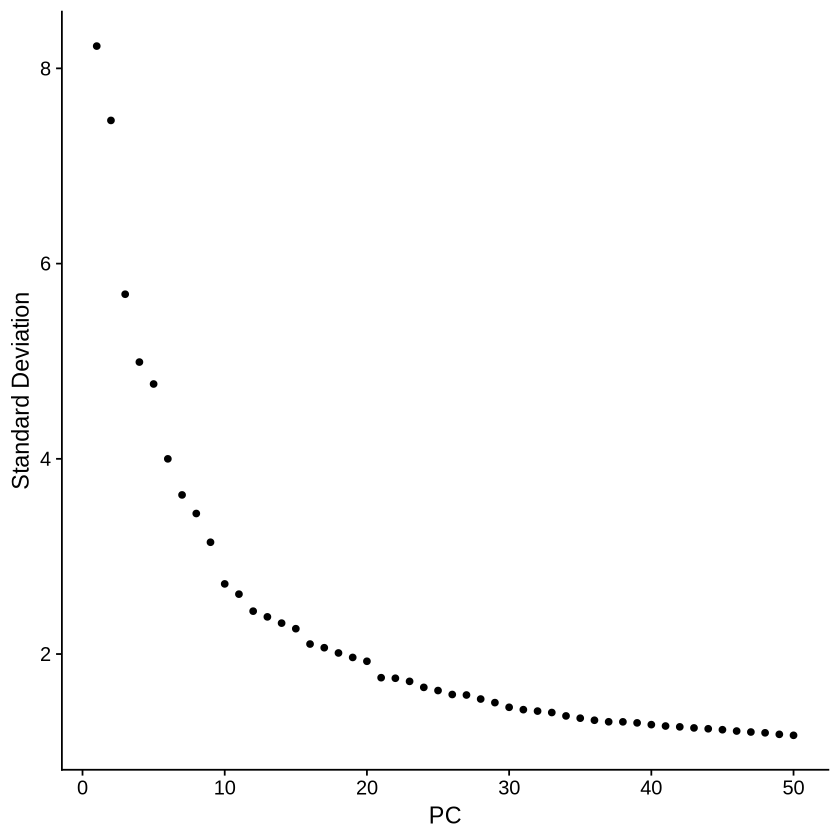

In [2]:
item = 'ref_m_kidney'
adata_ref = load_seuratobj(file.path(p_cache,'healty/m_kidney'))
adata_ref
adata_ref %>% head(2)

adata_ref = Map_Seruat_normalize(adata_ref)

p = ElbowPlot(adata_ref,ndims = 50)
ggsave(file.path(sprintf('ElbowPlot_%s.png',item)),p)
cat(sprintf('[out] ElbowPlot_%s.png\n',item))

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


,cell_name,orig.ident,nCount_RNA,nFeature_RNA,Cluster_Number,pre_cell_type,cell_type,RNA_snn_res.0.1,seurat_clusters
,<chr>,<fct>,<dbl>,<int>,<int>,<chr>,<chr>,<fct>,<fct>
AAACCTGAGATATGCA-1,AAACCTGAGATATGCA-1,SeuratProject,1441,672,3,LOH,LOH,1,1
AAACCTGGTTGTGGCC-1,AAACCTGGTTGTGGCC-1,SeuratProject,3465,1276,5,CD-PC,CD-PC,2,2


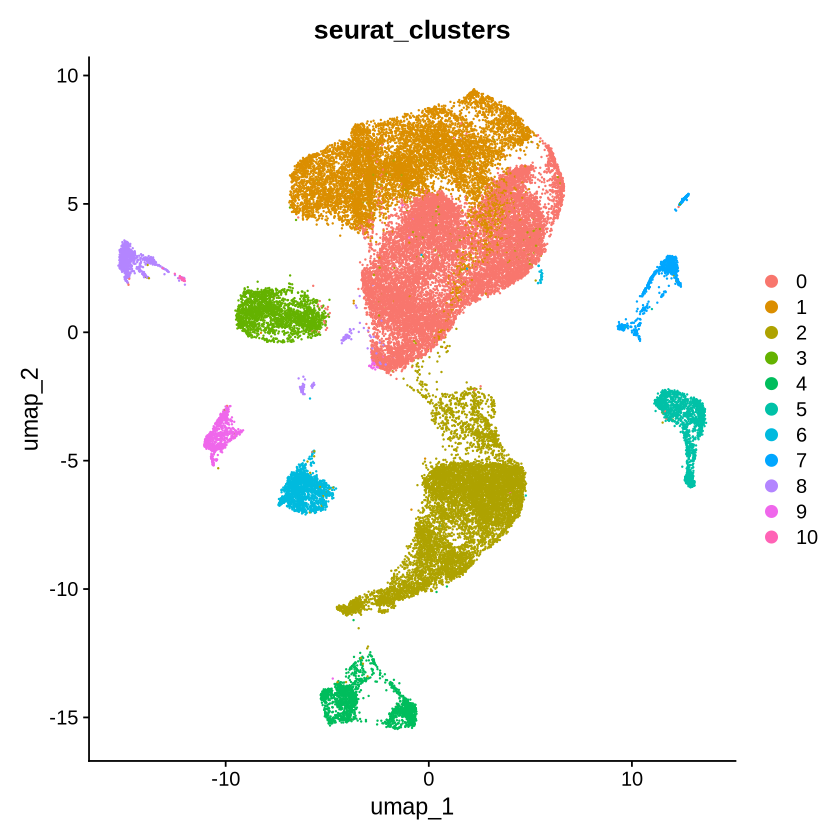

In [3]:
# Map_Seruat_cluster(adata,dims,resolution,key_celltype=NULL,verbose=FALSE)
adata_ref = Map_Seruat_cluster(adata_ref,1:20,0.1)
adata_ref@meta.data %>% head(2)

In [4]:
show_(adata_ref@reductions$umap)

--------------------
	S4 DimReduc
	@ cell.embeddings feature.loadings feature.loadings.projected assay.used global stdev jackstraw misc key 
	$ umap_1 umap_2 


In [5]:
df_umap = adata_ref@reductions$umap@cell.embeddings %>% as.data.frame
df_umap = df_umap %>% mutate(cell_name = rownames(df_umap))


adata_ref@meta.data = adata_ref@meta.data %>% left_join(
    df_umap,by = 'cell_name'
)
rownames(adata_ref@meta.data) = adata_ref@meta.data$cell_name
adata_ref@meta.data %>% head(2)

adata_ref@meta.data %>% write_csv(file.path(sprintf('obs_%s.csv',item)))
cat(sprintf('[out] obs_%s.csv\n',item))

,cell_name,orig.ident,nCount_RNA,nFeature_RNA,Cluster_Number,pre_cell_type,cell_type,RNA_snn_res.0.1,seurat_clusters,umap_1,umap_2
,<chr>,<fct>,<dbl>,<int>,<int>,<chr>,<chr>,<fct>,<fct>,<dbl>,<dbl>
AAACCTGAGATATGCA-1,AAACCTGAGATATGCA-1,SeuratProject,1441,672,3,LOH,LOH,1,1,-1.293267,7.354623
AAACCTGGTTGTGGCC-1,AAACCTGGTTGTGGCC-1,SeuratProject,3465,1276,5,CD-PC,CD-PC,2,2,3.019838,-7.278323


[out] obs_ref_m_kidney.csv


Saving 6.67 x 6.67 in image


[out] ElbowPlot_ref_m_kidney.png


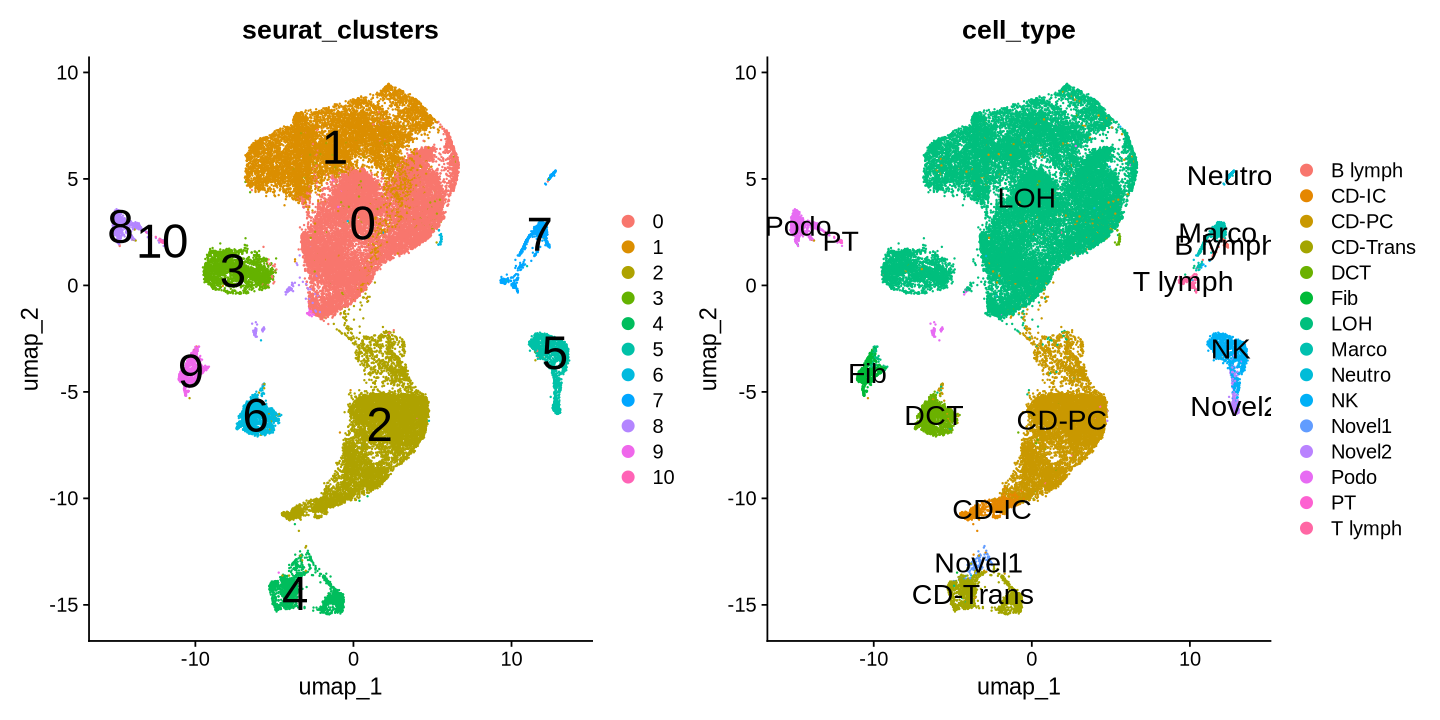

In [6]:

options(repr.plot.height = 6, repr.plot.width = 6 * 2)
p = UMAPPlot(
    adata_ref,group.by='seurat_clusters',label =TRUE,label.size = 10) + UMAPPlot(
    adata_ref,group.by='cell_type',label =TRUE,label.size = 6)
ggsave(file.path(sprintf('UMAP_%s.png',item)),p)
cat(sprintf('[out] ElbowPlot_%s.png\n',item))
p

# adata_que

,cell_name,orig.ident,nCount_RNA,nFeature_RNA,X_batch,treatment,sample
,<chr>,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>
AAACCCAGTAGACAGC-1;B42,AAACCCAGTAGACAGC-1;B42,SeuratProject,8045,2201,SLE_FMT_B42,SLE_FMT,B42
AAACCCAGTCTCGGAC-1;B42,AAACCCAGTCTCGGAC-1;B42,SeuratProject,7648,2025,SLE_FMT_B42,SLE_FMT,B42


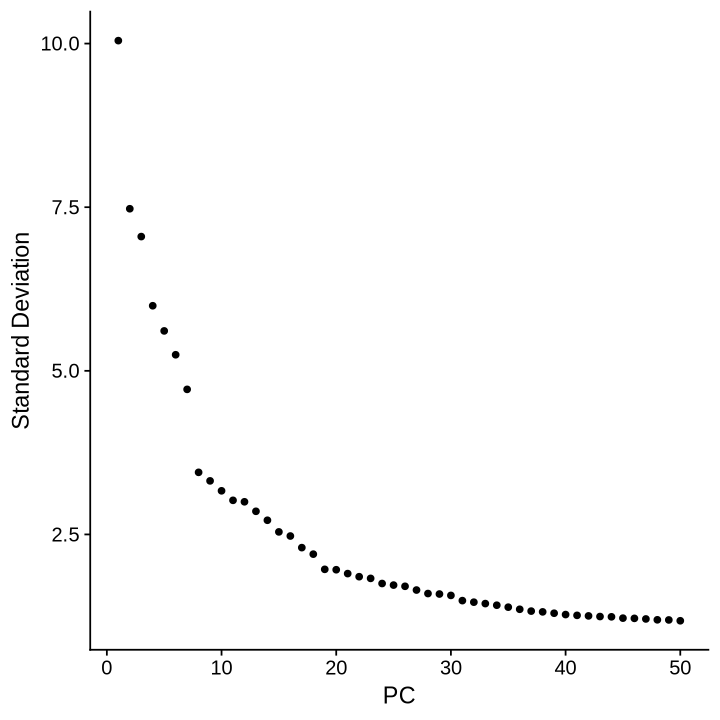

In [7]:
options(repr.plot.height = 6, repr.plot.width = 6)
item = 'que_SLE_GSE255441'
adata_que = load_seuratobj('SLE_mouse_LN_kidney')
adata_que@meta.data %>% head(2)
adata_que = Map_Seruat_normalize(adata_que)

Saving 6.67 x 6.67 in image


[out] ElbowPlot_que_SLE_GSE255441.png


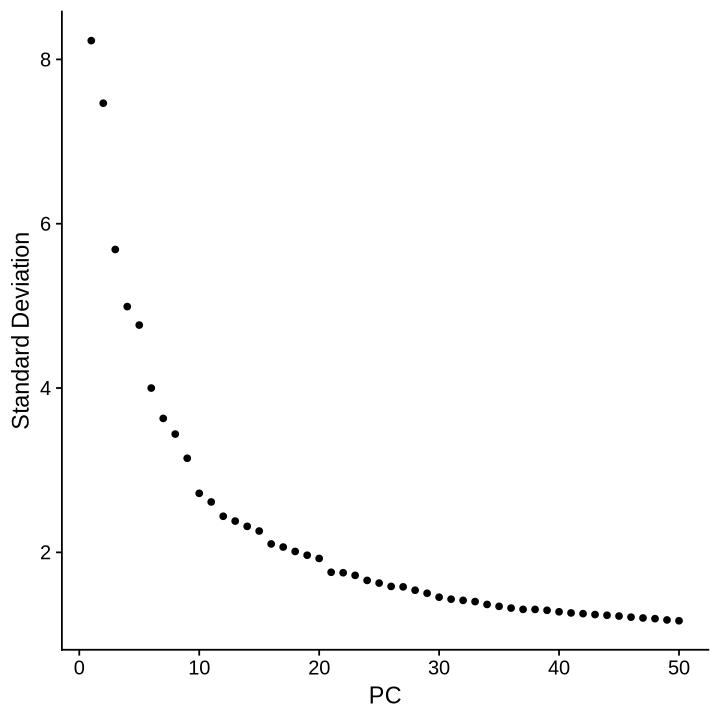

In [8]:
options(repr.plot.height = 6, repr.plot.width = 6 )
p = ElbowPlot(adata_ref,ndims = 50)
ggsave(file.path(sprintf('ElbowPlot_%s.png',item)),p)
cat(sprintf('[out] ElbowPlot_%s.png\n',item))
p

X_batch,n
<chr>,<int>
SLE_C15,5877
SLE_D2,4338
SLE_FMT_B42,7003
SLE_FMT_B48,5593
SLE_FMT_B50,3426


Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations



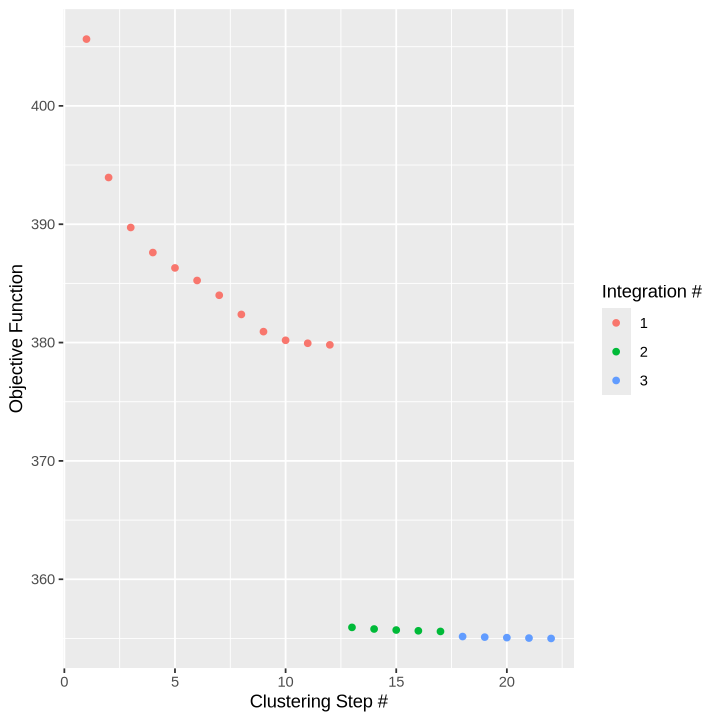

In [9]:
key_batch = 'X_batch'
adata_que@meta.data %>% count(.data[[key_batch]])
adata_que <- adata_que %>% RunHarmony(key_batch,
        plot_convergence = TRUE, return.model = TRUE)

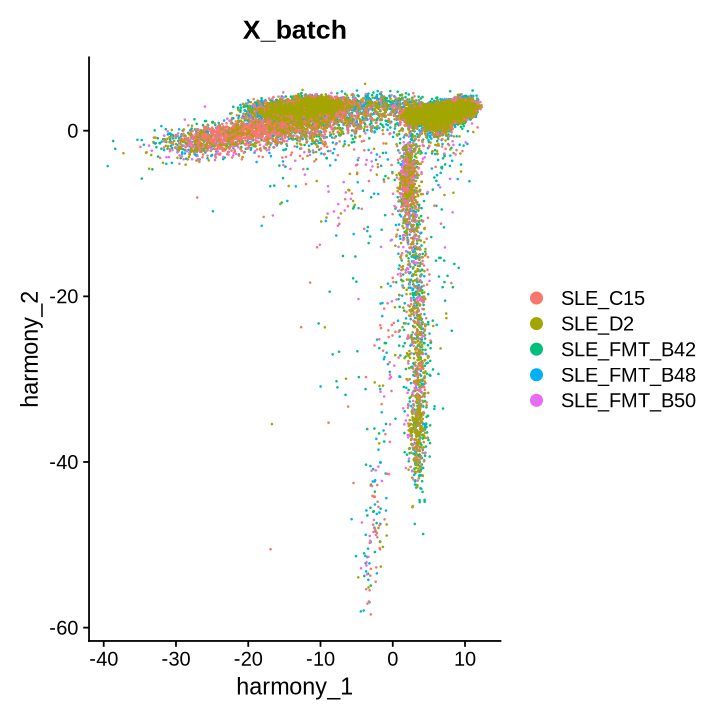

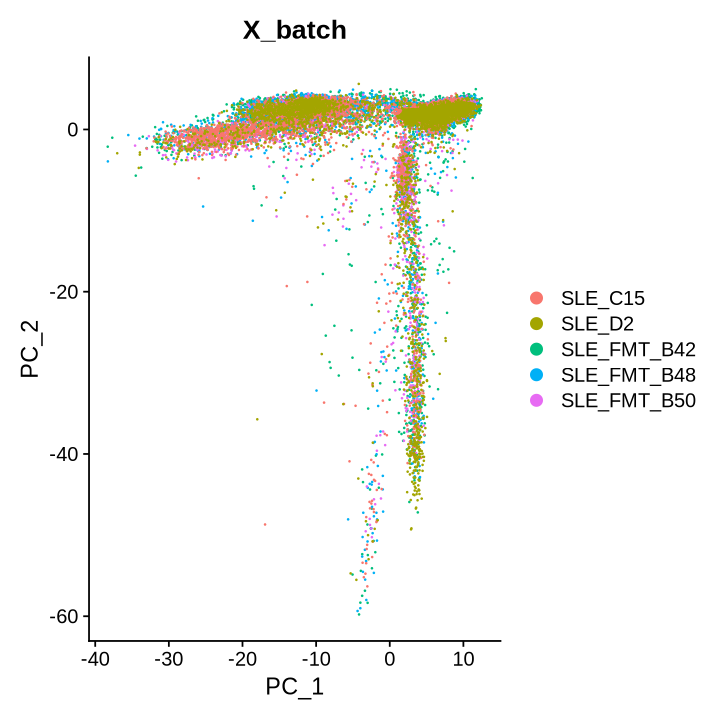

In [10]:
DimPlot(object = adata_que, reduction = "harmony", pt.size = .1, group.by = key_batch)
DimPlot(object = adata_que, reduction = "pca", pt.size = .1, group.by = key_batch)

In [11]:
adata_ref@meta.data %>% head(2)

,cell_name,orig.ident,nCount_RNA,nFeature_RNA,Cluster_Number,pre_cell_type,cell_type,RNA_snn_res.0.1,seurat_clusters,umap_1,umap_2
,<chr>,<fct>,<dbl>,<int>,<int>,<chr>,<chr>,<fct>,<fct>,<dbl>,<dbl>
AAACCTGAGATATGCA-1,AAACCTGAGATATGCA-1,SeuratProject,1441,672,3,LOH,LOH,1,1,-1.293267,7.354623
AAACCTGGTTGTGGCC-1,AAACCTGGTTGTGGCC-1,SeuratProject,3465,1276,5,CD-PC,CD-PC,2,2,3.019838,-7.278323


In [12]:
# Map_Seruat_mapquery(adata_ref, adata_que, dims, refdata, reference.reduction = "pca",
refdata = list('.' = 'cell_type')
adata_que = Map_Seruat_mapquery(adata_ref,adata_que,
                    dims= 1:20,refdata = refdata,
                   reference.reduction = "pca")

Computing nearest neighbors

Running UMAP projection

00:50:43 Read 26237 rows

00:50:43 Processing block 1 of 1

00:50:43 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

00:50:43 Initializing by weighted average of neighbor coordinates using 1 thread

00:50:43 Commencing optimization for 67 epochs, with 787110 positive edges

00:50:53 Finished



In [13]:
adata_que@meta.data %>% colnames

[1] "cell_name"         "orig.ident"        "nCount_RNA"       
[4] "nFeature_RNA"      "X_batch"           "treatment"        
[7] "sample"            "predicted...score" "predicted.."

In [14]:
adata_que

An object of class Seurat 
28013 features across 26237 samples within 2 assays 
Active assay: RNA (27998 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: prediction.score..
 4 dimensional reductions calculated: pca, harmony, ref.pca, ref.umap

Saving 6.67 x 6.67 in image


[out] UMAP_que_SLE_GSE255441.png


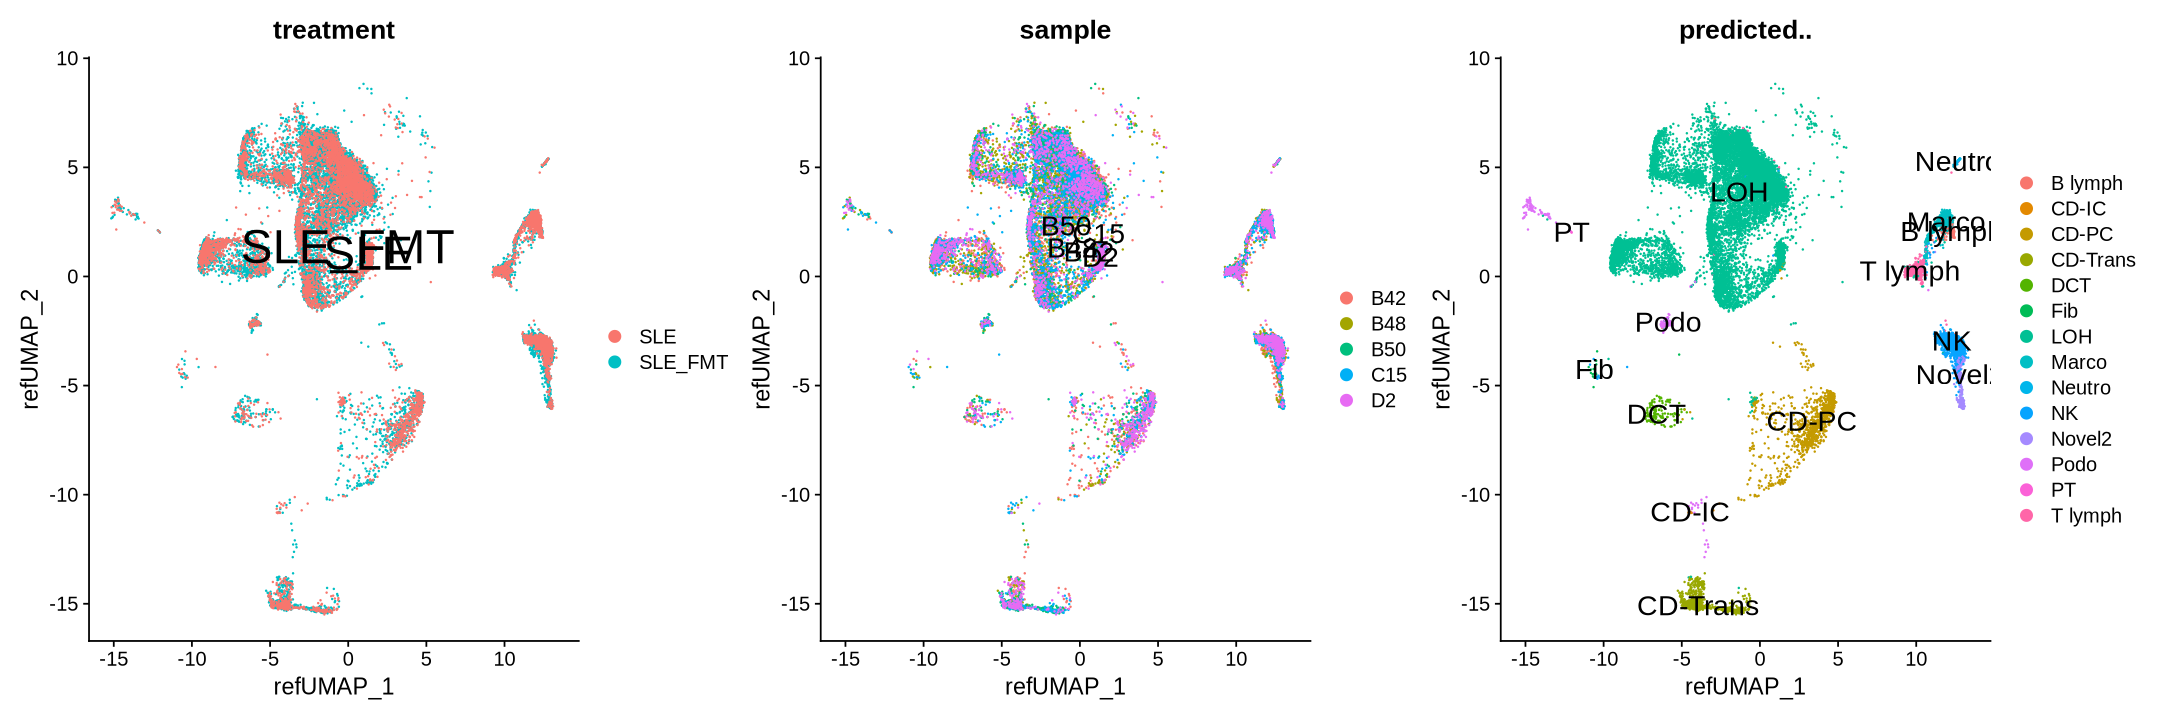

In [15]:
# adata_ref@meta.data %>% write_csv(file.path(sprintf('obs_%s.csv',item)))
# cat(sprintf('[out] obs_%s.csv\n',item))

options(repr.plot.height = 6, repr.plot.width = 6 * 3)
p = DimPlot(adata_que,group.by='treatment',label =TRUE,
            label.size = 10,reduction='ref.umap') + 
    DimPlot(adata_que,group.by='sample',label =TRUE,
            label.size = 6,reduction='ref.umap')+ 
    DimPlot(adata_que,group.by='predicted..',label =TRUE,
            label.size = 6,reduction='ref.umap')
ggsave(file.path(sprintf('UMAP_%s.png',item)),p)
cat(sprintf('[out] UMAP_%s.png\n',item))
p

In [16]:
df_umap = adata_que@reductions$ref.umap@cell.embeddings %>% as.data.frame
df_umap = df_umap %>% mutate(cell_name = rownames(df_umap))
adata_que@meta.data = adata_que@meta.data %>% left_join(
    df_umap,by = 'cell_name'
)
rownames(adata_que@meta.data) = adata_que@meta.data$cell_name
adata_que@meta.data = adata_que@meta.data %>% 
    select(cell_name,X_batch,treatment,sample,
           predicted..,refUMAP_1,refUMAP_2) %>%
    mutate(cell_type= predicted..,.before = predicted..)
adata_que@meta.data %>% head(2)
adata_que@meta.data %>% write_csv(file.path(sprintf('obs_%s.csv',item)))
cat(sprintf('[out] obs_%s.csv\n',item))

,X_batch,treatment,sample,cell_type,predicted..,refUMAP_1,refUMAP_2
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
AAACCCAGTAGACAGC-1;B42,SLE_FMT_B42,SLE_FMT,B42,LOH,LOH,-0.7911626,6.354379
AAACCCAGTCTCGGAC-1;B42,SLE_FMT_B42,SLE_FMT,B42,LOH,LOH,0.6628870,4.750667


[out] obs_que_SLE_GSE255441.csv
